In [56]:
import scipy as sc
import numpy as np
from scipy import stats
from itertools import product

from matplotlib import pyplot as plt

In [3]:
P1 = np.array([[0.6, 0.2, 0.2],
               [0.3, 0.1, 0.6],
               [0.5, 0.2, 0.3]])

In [6]:
eigvals, eigv = sc.linalg.eig(P1, left=True, right=False)

In [15]:
eigvals

array([ 1. +0.j,  0.1+0.j, -0.1+0.j])

In [28]:
pst1 = eigv[:, 0]
pst1 = pst1 / np.sum(pst1)
pst1

array([0.51515152, 0.18181818, 0.3030303 ])

In [32]:
np.linalg.matrix_power(P1, 10)

array([[0.51515152, 0.18181818, 0.3030303 ],
       [0.51515152, 0.18181818, 0.3030303 ],
       [0.51515152, 0.18181818, 0.3030303 ]])

In [50]:
def check_detailed_balance(P, pst):
    for i, j in product(range(1,3), range(1, 3)):
        if not np.allclose(P[i, j] * pst[i], P[j, i] * pst[j]):
            return False
    return True            

In [52]:
check_detailed_balance(P1, pst1)

False

In [48]:
P2 = np.array([[0.2, 0.4, 0.4], 
              [0.1, 0.6, 0.3], 
              [0.2, 0.6, 0.2]])
pst2 = np.array([1/7, 4/7, 2/7])

In [51]:
check_detailed_balance(P2, pst2)

True

In [78]:
def mcmc_gibbs(n, n_burn=0):
    result = np.empty((n, 2))

    xlast = np.empty(2)    
    xlast[0] = stats.norm.rvs(size=1, loc=3, scale=2)
    xlast[1] = stats.norm.rvs(size=1, loc=2, scale=3)
    
    for i in range(n_burn):
        xlast[0] = stats.norm.rvs(size=1, loc=3 + 1/3 * (xlast[1] - 2), scale=np.sqrt(3))
        xlast[1] = stats.norm.rvs(size=1, loc=2 + 3/4 * (xlast[0] - 3), scale=np.sqrt(27/4))

    for i in range(n):
        xlast[0] = stats.norm.rvs(size=1, loc=3 + 1/3 * (xlast[1] - 2), scale=np.sqrt(3))
        xlast[1] = stats.norm.rvs(size=1, loc=2 + 3/4 * (xlast[0] - 3), scale=np.sqrt(27/4))
        result[i] = xlast

    return result

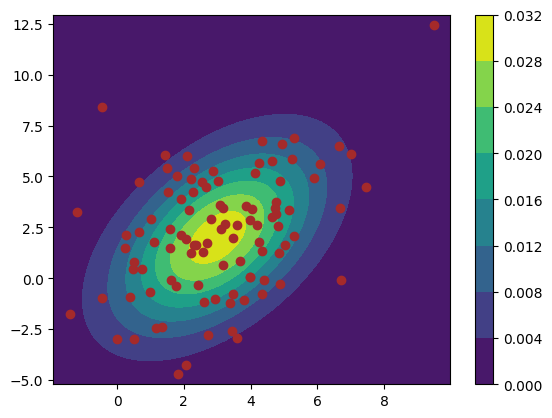

In [87]:
samples = mcmc_gibbs(100, 10)

x1 = np.min(samples[:, 0]) - 0.5
x2 = np.max(samples[:, 0]) + 0.5
y1 = np.min(samples[:, 1]) - 0.5
y2 = np.max(samples[:, 1]) + 0.5

x, y = np.mgrid[x1:x2:.01, y1:y2:.01]
points = np.dstack((x, y))
density = stats.multivariate_normal.pdf(points, mean=np.array([3, 2]), cov=np.array([[4, 3], [3, 9]]))
c = plt.contourf(x, y, density)
plt.colorbar(c)

plt.scatter(samples[:, 0], samples[:, 1], color='brown');